In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# %matplotlib osx

In [2]:
def heatEqn(C, arr, i):
    return (C * (arr[i+1] - 2 *arr[i] + arr[i-1])) + arr[i]

In [3]:
def dike(C, deltat, arr, timeInSeconds):
    numIterations = timeInSeconds // deltat
    TNew = np.copy(arr)
    for iteration in range(numIterations):
        TOld = np.copy(TNew)
        for i in range(1, len(TNew) - 1):
            TNew[i] = heatEqn(C, TOld, i)
    return TNew[len(TNew) // 2]

In [4]:
def printTable(C, deltat, arr):
    hour = dike(C, deltat, arr, hourInS)
    day = dike(C, deltat, arr, dayInS)
    week = dike(C, deltat, arr, weekInS)
    month = dike(C, deltat, arr, monthInS)
    year = dike(C, deltat, arr, yearInS)
    print("hour: " + str(hour)  + "\n day: " + str(day))
    print("week: " + str(week)  + "\n month: " + str(month) + "\n year: " + str(year))

In [5]:
hourInS = 3600
dayInS = hourInS * 24
weekInS = dayInS * 7
monthInS = dayInS * 31
yearInS = monthInS * 12

In [6]:
N = 50
T = np.zeros([5 * N + 1])

lavaTC = 1300
#lavaT = lavaTC + 273.15

leftDike = (len(T) // 2) - 25
rightDike = (len(T) // 2) + 25 + 1
T[leftDike:rightDike] = lavaTC

In [7]:
deltat = 4620
kappa = 0.032 # heat conductance
deltaX = 10 # 500 * 5 / 250
c = 1.12 # heat capacity
rho = 2.65 # density
eta = deltat * kappa / (deltaX ** 2)
# C = eta / (c * rho)
C = (deltat * kappa) / ((deltaX ** 2) * c * rho)

k = kappa / (c * rho)

What unit of length do you use in your code? cm

What unit of time do you use? seconds

What is the coefficient k (see lecture 11)? Specify value and units: heat conductance, 0.032 J/cm/s/K

What is you grid spacing deltax? 25 meters / 250 so 0.1 m or 10 cm 

What is your time step deltat? 4620 seconds or 77 mins (should be on the order of minutes)

Work out the coefficient eta (see lecture 11)? eta is 0.4992  


In [8]:
printTable(C, deltat, T)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 304.9442256900808


In [9]:
T

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.,
       1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.,
       1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.,
       1300., 1300.,

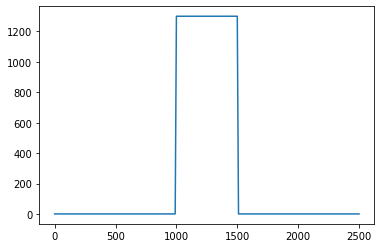

In [9]:
plt.plot(np.linspace(0, 2500, 251), T)
plt.show()

## (2)

In [10]:
# my eta is approximately equal based on this function

def findDeltatX(arr, N):
    d = 500
    L = (4 * d) + (N * 10)
    deltaX = L // (len(arr) - 1)
    kappa = 0.032
    c = 1.12 # heat capacity
    rho = 2.65 # density
    
    bestDeltat = 60
    while (bestDeltat * kappa) / ((deltaX ** 2) * c * rho) < 0.5:
        bestDeltat += 60
    return bestDeltat - 60, deltaX

In [11]:
# adjust N
N = 100
T2 = np.zeros([50 + 50 + N + 50 + 50 + 1])
deltat, deltaX = findDeltatX(T2, N)

eta = deltat * kappa /(deltaX ** 2)
C2 = eta / (c * rho)


leftDike = (len(T2) // 2) - (N//2)
rightDike = (len(T2) // 2) + (N//2) + 1
T2[leftDike:rightDike] = lavaTC
printTable(C2, deltat, T2)

hour: 1300.0
 day: 1300.0
week: 1299.9914938304778
 month: 1253.894397392952
 year: 589.1649695029041


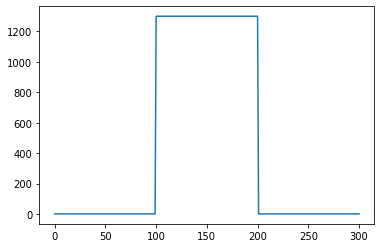

In [12]:
plt.plot(T2)
plt.show()

##### I used N = 150. If N increases by a factor of 2, then 4 times more calculations are done

In [13]:
# adjust N
N = 150

T2 = np.zeros([50 + 50 + N + 50 + 50 + 1])
deltat, deltaX = findDeltatX(T2, N)

eta = deltat * kappa /(deltaX ** 2)
C2 = eta / (c * rho)

leftDike = (len(T2) // 2) - 25
rightDike = (len(T2) // 2) + 25 + 1
T2[leftDike:rightDike] = lavaTC

printTable(C2, deltat, T2)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 312.7088136721028


In [14]:
# adjust N
N = 200

T2 = np.zeros([50 + 50 + N + 50 + 50 + 1])
deltat, deltaX = findDeltatX(T2, N)

eta = deltat * kappa /(deltaX ** 2)
C2 = eta / (c * rho)

leftDike = (len(T2) // 2) - 25
rightDike = (len(T2) // 2) + 25 + 1
T2[leftDike:rightDike] = lavaTC

printTable(C2, deltat, T2)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 312.8177357537023


## (3)

In [15]:
def findDeltatX(arr, N, f):
    d = 500
    L = (f * d * 2) + (N * 10)
    deltaX = L // (len(arr) - 1)
    kappa = 0.032
    c = 1.12 # heat capacity
    rho = 2.65 # density
    
    bestDeltat = 60
    while (bestDeltat * kappa) / ((deltaX ** 2) * c * rho) < 0.5:
        bestDeltat += 60
    return bestDeltat - 60, deltaX

In [16]:
N = 50
T3 = np.zeros([5 * N + 1])

lavaTC = 1300

deltat, deltaX = findDeltatX(T3, N, 2)

C3 = (deltat * kappa) / ((deltaX ** 2) * c * rho)

leftDike = (len(T3) // 2) - 25
rightDike = (len(T3) // 2) + 25 + 1
T3[leftDike:rightDike] = lavaTC

printTable(C3, deltat, T3)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 304.9442256900808


In [17]:
N = 50
T3 = np.zeros([9 * N + 1])

lavaTC = 1300

deltat, deltaX = findDeltatX(T3, N, 4)

C3 = (deltat * kappa) / ((deltaX ** 2) * c * rho)

leftDike = (len(T3) // 2) - 25
rightDike = (len(T3) // 2) + 25 + 1
T3[leftDike:rightDike] = lavaTC

printTable(C3, deltat, T3)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 312.8257436668626


In [18]:
THeat = T3
CHeat = C3
deltatHeat = deltat

In [19]:
N = 50
T3 = np.zeros([13 * N + 1])

deltat, deltaX = findDeltatX(T3, N, 6)

C3 = (deltat * kappa) / ((deltaX ** 2) * c * rho)

leftDike = (len(T3) // 2) - 25
rightDike = (len(T3) // 2) + 25 + 1
T3[leftDike:rightDike] = lavaTC

printTable(C3, deltat, T3)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 312.8261689408788


In [20]:
N = 50
T3 = np.zeros([17 * N + 1])

deltat, deltaX = findDeltatX(T3, N, 8)

C3 = (deltat * kappa) / ((deltaX ** 2) * c * rho)

leftDike = (len(T3) // 2) - 25
rightDike = (len(T3) // 2) + 25 + 1
T3[leftDike:rightDike] = lavaTC

printTable(C3, deltat, T3)

hour: 1300.0
 day: 1300.0
week: 1266.3499983575875
 month: 925.1750520923002
 year: 312.82616894095685


In [21]:
sum(T3[leftDike:rightDike])

66300.0

## (4)

In [22]:
def dikeHeat(C, deltat, arr, timeInSeconds):
    numIterations = timeInSeconds // deltat
    TNew = np.copy(arr)
    
    leftDike = (len(arr) // 2) - 25
    rightDike = (len(arr) // 2) + 25 + 1
    initialQ = sum(TNew)
    for iteration in range(numIterations):
        TOld = np.copy(TNew)
        for i in range(1, len(TNew) - 1):
            TNew[i] = heatEqn(C, TOld, i)
    finalQ = sum(TNew[leftDike:rightDike])
    return (initialQ - finalQ) / initialQ

def printHeatLoss(C, deltat, arr):
    hour = dikeHeat(C, deltat, arr, hourInS)
    day = dikeHeat(C, deltat, arr, dayInS)
    week = dikeHeat(C, deltat, arr, weekInS)
    month = dikeHeat(C, deltat, arr, monthInS)
    year = dikeHeat(C, deltat, arr, yearInS)
    
    print("Heat loss:")
    print("hour: " + str(hour)  + "\n day: " + str(day))
    print("week: " + str(week)  + "\n month: " + str(month) + "\n year: " + str(year))

In [23]:
printHeatLoss(CHeat, deltatHeat, THeat)

Heat loss:
hour: 0.0
 day: 0.06545214390505774
week: 0.1779127829088064
 month: 0.3700601963745675
 year: 0.7629610753297259
